In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(
    "/Users/gabrielmancillas/Documents/GitHub/StudentPerformancePrediction/dataset.csv"
)

In [2]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# numbers of students
df.shape

(4424, 35)

In [4]:
df.rename(columns={"Nacionality": "Nationality"}, inplace=True)

In [5]:
df.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,...,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,...,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,...,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,...,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,...,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,...,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,...,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
print(df.isna().sum())
print("Total Missing: ", df.isna().sum().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

**we are working zero missing values**

In [8]:
print("Total Duplicates: ", df.duplicated().sum())

Total Duplicates:  0


In [9]:
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_71228/3695237206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Target", palette="viridis")


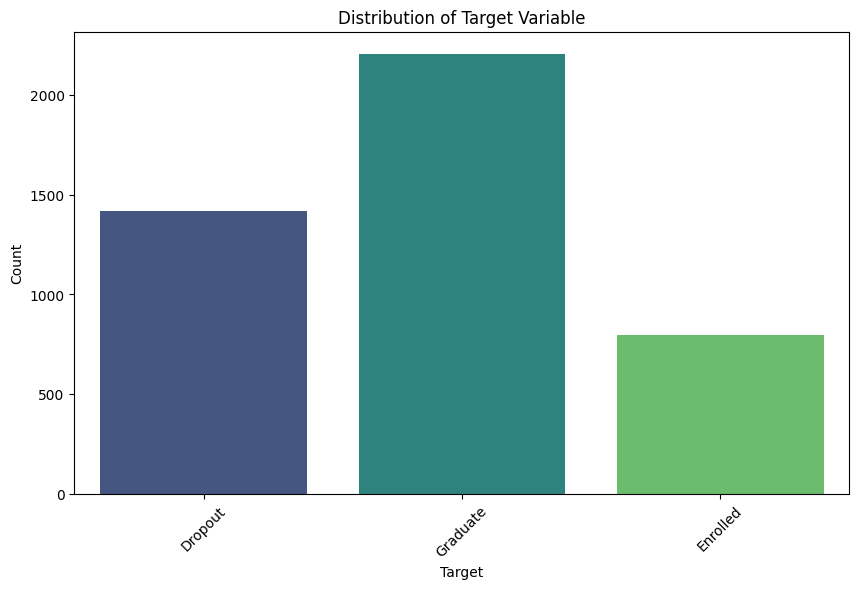

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Target", palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [11]:
df = df[df.Target != "Enrolled"]

In [12]:
df.shape

(3630, 35)

In [13]:
freq_distribution = df["Target"].value_counts().to_frame(name="Count")
freq_distribution["% of Total"] = (
    df["Target"].value_counts(normalize=True) * 100
).round(2)
freq_distribution

,Count,% of Total
Target,,
Graduate,2209,60.85
Dropout,1421,39.15


/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_71228/4072685011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Target", palette="viridis")  # Changed palette to 'viridis'


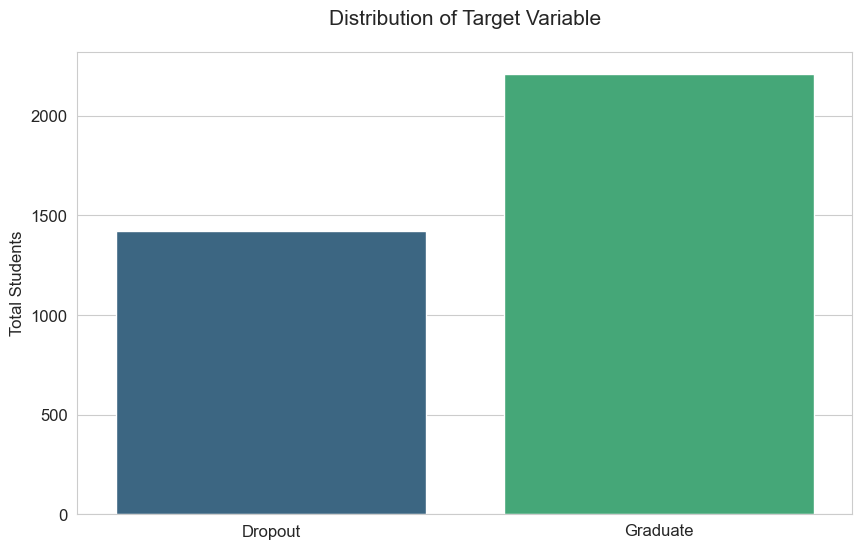

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Target", palette="viridis")  # Changed palette to 'viridis'

plt.ylabel("Total Students", fontsize=12)
plt.xlabel(None)
plt.title("Distribution of Target Variable", pad=20, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

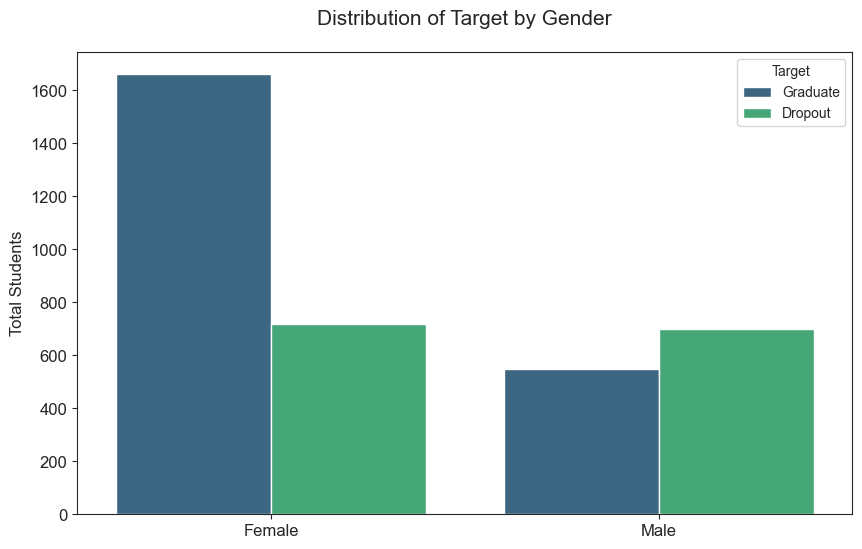

In [15]:
sns.set_style("ticks")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Gender", hue="Target", palette="viridis")

plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.ylabel("Total Students", fontsize=12)
plt.xlabel(None)
plt.title("Distribution of Target by Gender", pad=20, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

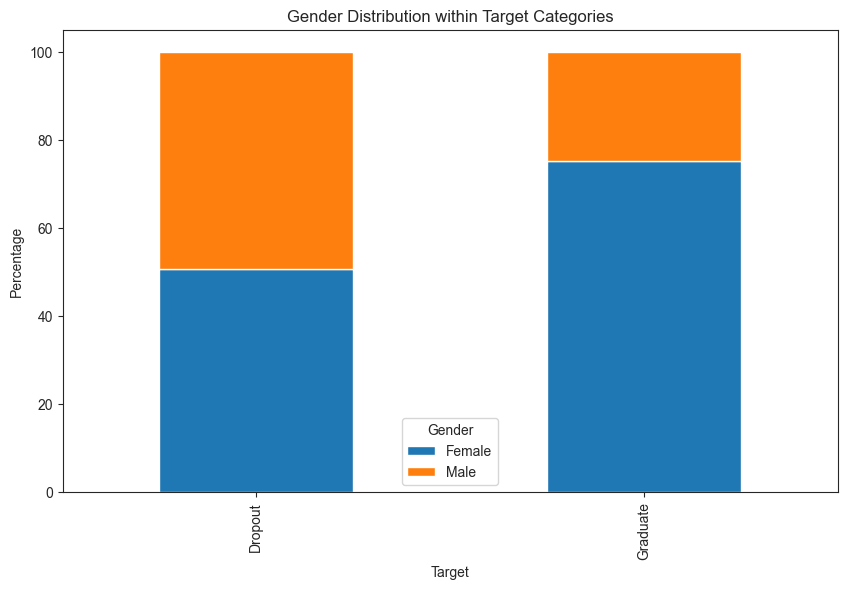

In [16]:
# Calculate the crosstab of Target and Gender
ct_gender = pd.crosstab(df["Target"], df["Gender"])

# Rename columns for better readability
ct_gender.columns = ["Female", "Male"]

# Calculate the percentage distribution within each Target category
ct_gender_percentage = ct_gender.div(ct_gender.sum(axis=1), axis=0) * 100

# Display the crosstab with counts and percentages
ct_gender_combined = ct_gender.copy()
ct_gender_combined["Female (%)"] = ct_gender_percentage["Female"]
ct_gender_combined["Male (%)"] = ct_gender_percentage["Male"]

# Add a column for the total percentage
ct_gender_combined["Total (%)"] = (
    ct_gender_combined["Female (%)"] + ct_gender_combined["Male (%)"]
)
ct_gender_combined

# Plot the percentage distribution using a stacked bar plot
ct_gender_percentage.plot(
    kind="bar", stacked=True, figsize=(10, 6), color=["#1f77b4", "#ff7f0e"]
)
plt.title("Gender Distribution within Target Categories")
plt.xlabel("Target")
plt.ylabel("Percentage")
plt.legend(title="Gender")
plt.show()

In [17]:
import plotly.express as px

# Create an interactive histogram with more bins
fig = px.histogram(
    df,
    x="Age at enrollment",
    nbins=30,
    title="Distribution by Age",
    labels={"Age at enrollment": "Age at Enrollment", "count": "Total Students"},
    color_discrete_sequence=["dodgerblue"],
)

# Customize the layout
fig.update_layout(
    title={"text": "Distribution by Age", "x": 0.5},
    xaxis_title="Age at Enrollment",
    yaxis_title="Total Students",
    bargap=0.1,
)

# Show the plot
fig.show()

In [18]:
# Create an interactive count plot
fig = px.histogram(
    df,
    x="Marital status",
    color="Target",
    barmode="group",
    title="Distribution of Target by Marital Status",
    labels={"Marital status": "Marital Status", "count": "Total Students"},
    color_discrete_sequence=["dodgerblue", "orange"],
)

# Customize the layout
fig.update_layout(
    title={"text": "Distribution of Target by Marital Status", "x": 0.5},
    xaxis_title="Marital Status",
    yaxis_title="Total Students",
    bargap=0.1,
)

# Change the x tick labels to the corresponding status
fig.update_xaxes(
    tickvals=[1, 2, 3, 4, 5, 6],
    ticktext=[
        "Single",
        "Married",
        "Widower",
        "Divorced",
        "Defacto union",
        "Legally separated",
    ],
)

# Show the plot
fig.show()

In [19]:
import plotly.express as px

# Group by Course and Target
student_courses = (
    df.groupby(["Course", "Target"])
    .size()
    .reset_index()
    .pivot(columns="Target", index="Course", values=0)
)
student_courses = student_courses.rename(
    index={
        1: "Biofuel Production Technologies",
        2: "Animation and Multimedia Design",
        3: "Social Service (evening attendance)",
        4: "Agronomy",
        5: "Communication Design",
        6: "Veterinary Nursing",
        7: "Informatics Engineering",
        8: "Equinculture",
        9: "Management",
        10: "Social Service",
        11: "Tourism",
        12: "Nursing",
        13: "Oral Hygiene",
        14: "Advertising and Marketing Management",
        15: "Journalism and Communication",
        16: "Basic Education",
        17: "Management (evening attendance)",
    }
)

# Ensure the 'Dropout' column exists
if "Dropout" not in student_courses.columns:
    student_courses["Dropout"] = student_courses[0]  # Assuming '0' represents dropouts

# Sum the total number of students for each course and sort for the plot
student_courses["Total"] = student_courses.sum(axis=1)
student_courses_sorted = student_courses.sort_values(by="Total", ascending=True)

# Remove the 'Total' column
student_courses_sorted.drop(columns="Total", inplace=True)

# Generate the interactive plot
fig = px.bar(
    student_courses_sorted,
    orientation="h",
    title="Distribution of Target by Course",
    labels={"value": "Total Students", "Course": "Course"},
    color_discrete_sequence=px.colors.qualitative.Pastel,
)

# Customize the layout
fig.update_layout(
    title={"text": "<b>Distribution of Target by Course</b>", "x": 0.5},
    xaxis_title="<b>Total Students</b>",
    yaxis_title=None,
    barmode="stack",
    width=1200,  # Increase the width
    height=800,  # Increase the height
)

# Show the plot
fig.show()

In [20]:
# Calculate the Dropout Rate and Graduate Rate
student_courses_sorted["Dropout Rate"] = (
    student_courses_sorted["Dropout"] / student_courses_sorted.sum(axis=1) * 100
).round(3)
student_courses_sorted["Graduate Rate"] = (
    student_courses_sorted["Graduate"] / student_courses_sorted.sum(axis=1) * 100
).round(3)

# Create a new DataFrame with only Dropout Rate and Graduate Rate
dropout_graduate_rates = student_courses_sorted[
    ["Dropout Rate", "Graduate Rate"]
].copy()

# Display the new DataFrame
dropout_graduate_rates

Target,Dropout Rate,Graduate Rate
Course,,
Biofuel Production Technologies,88.889,1.022
Oral Hygiene,47.826,30.815
Informatics Engineering,86.792,7.262
Equinculture,65.000,22.703
Basic Education,59.859,28.238
Agronomy,49.711,39.064
Animation and Multimedia Design,46.067,42.844
Communication Design,27.717,62.820
Social Service (evening attendance),36.598,53.340


### **Feature Selection**

In [21]:
df = pd.get_dummies(df, columns=["Target"])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,True,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,False,True
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,True,False
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,False,True


In [22]:
dummies_to_drop = ["Target_Graduate"]
df.drop(columns=dummies_to_drop, inplace=True)
df.rename(columns={"Target_Dropout": "Target"}, inplace=True)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,True
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,False
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,True
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,False
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,False


In [23]:
# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Calculate the correlation matrix and round it to 2 decimal places
correlation_matrix = df.corr().round(2)

# Display the correlation matrix
correlation_matrix

# Reset display options to default values
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

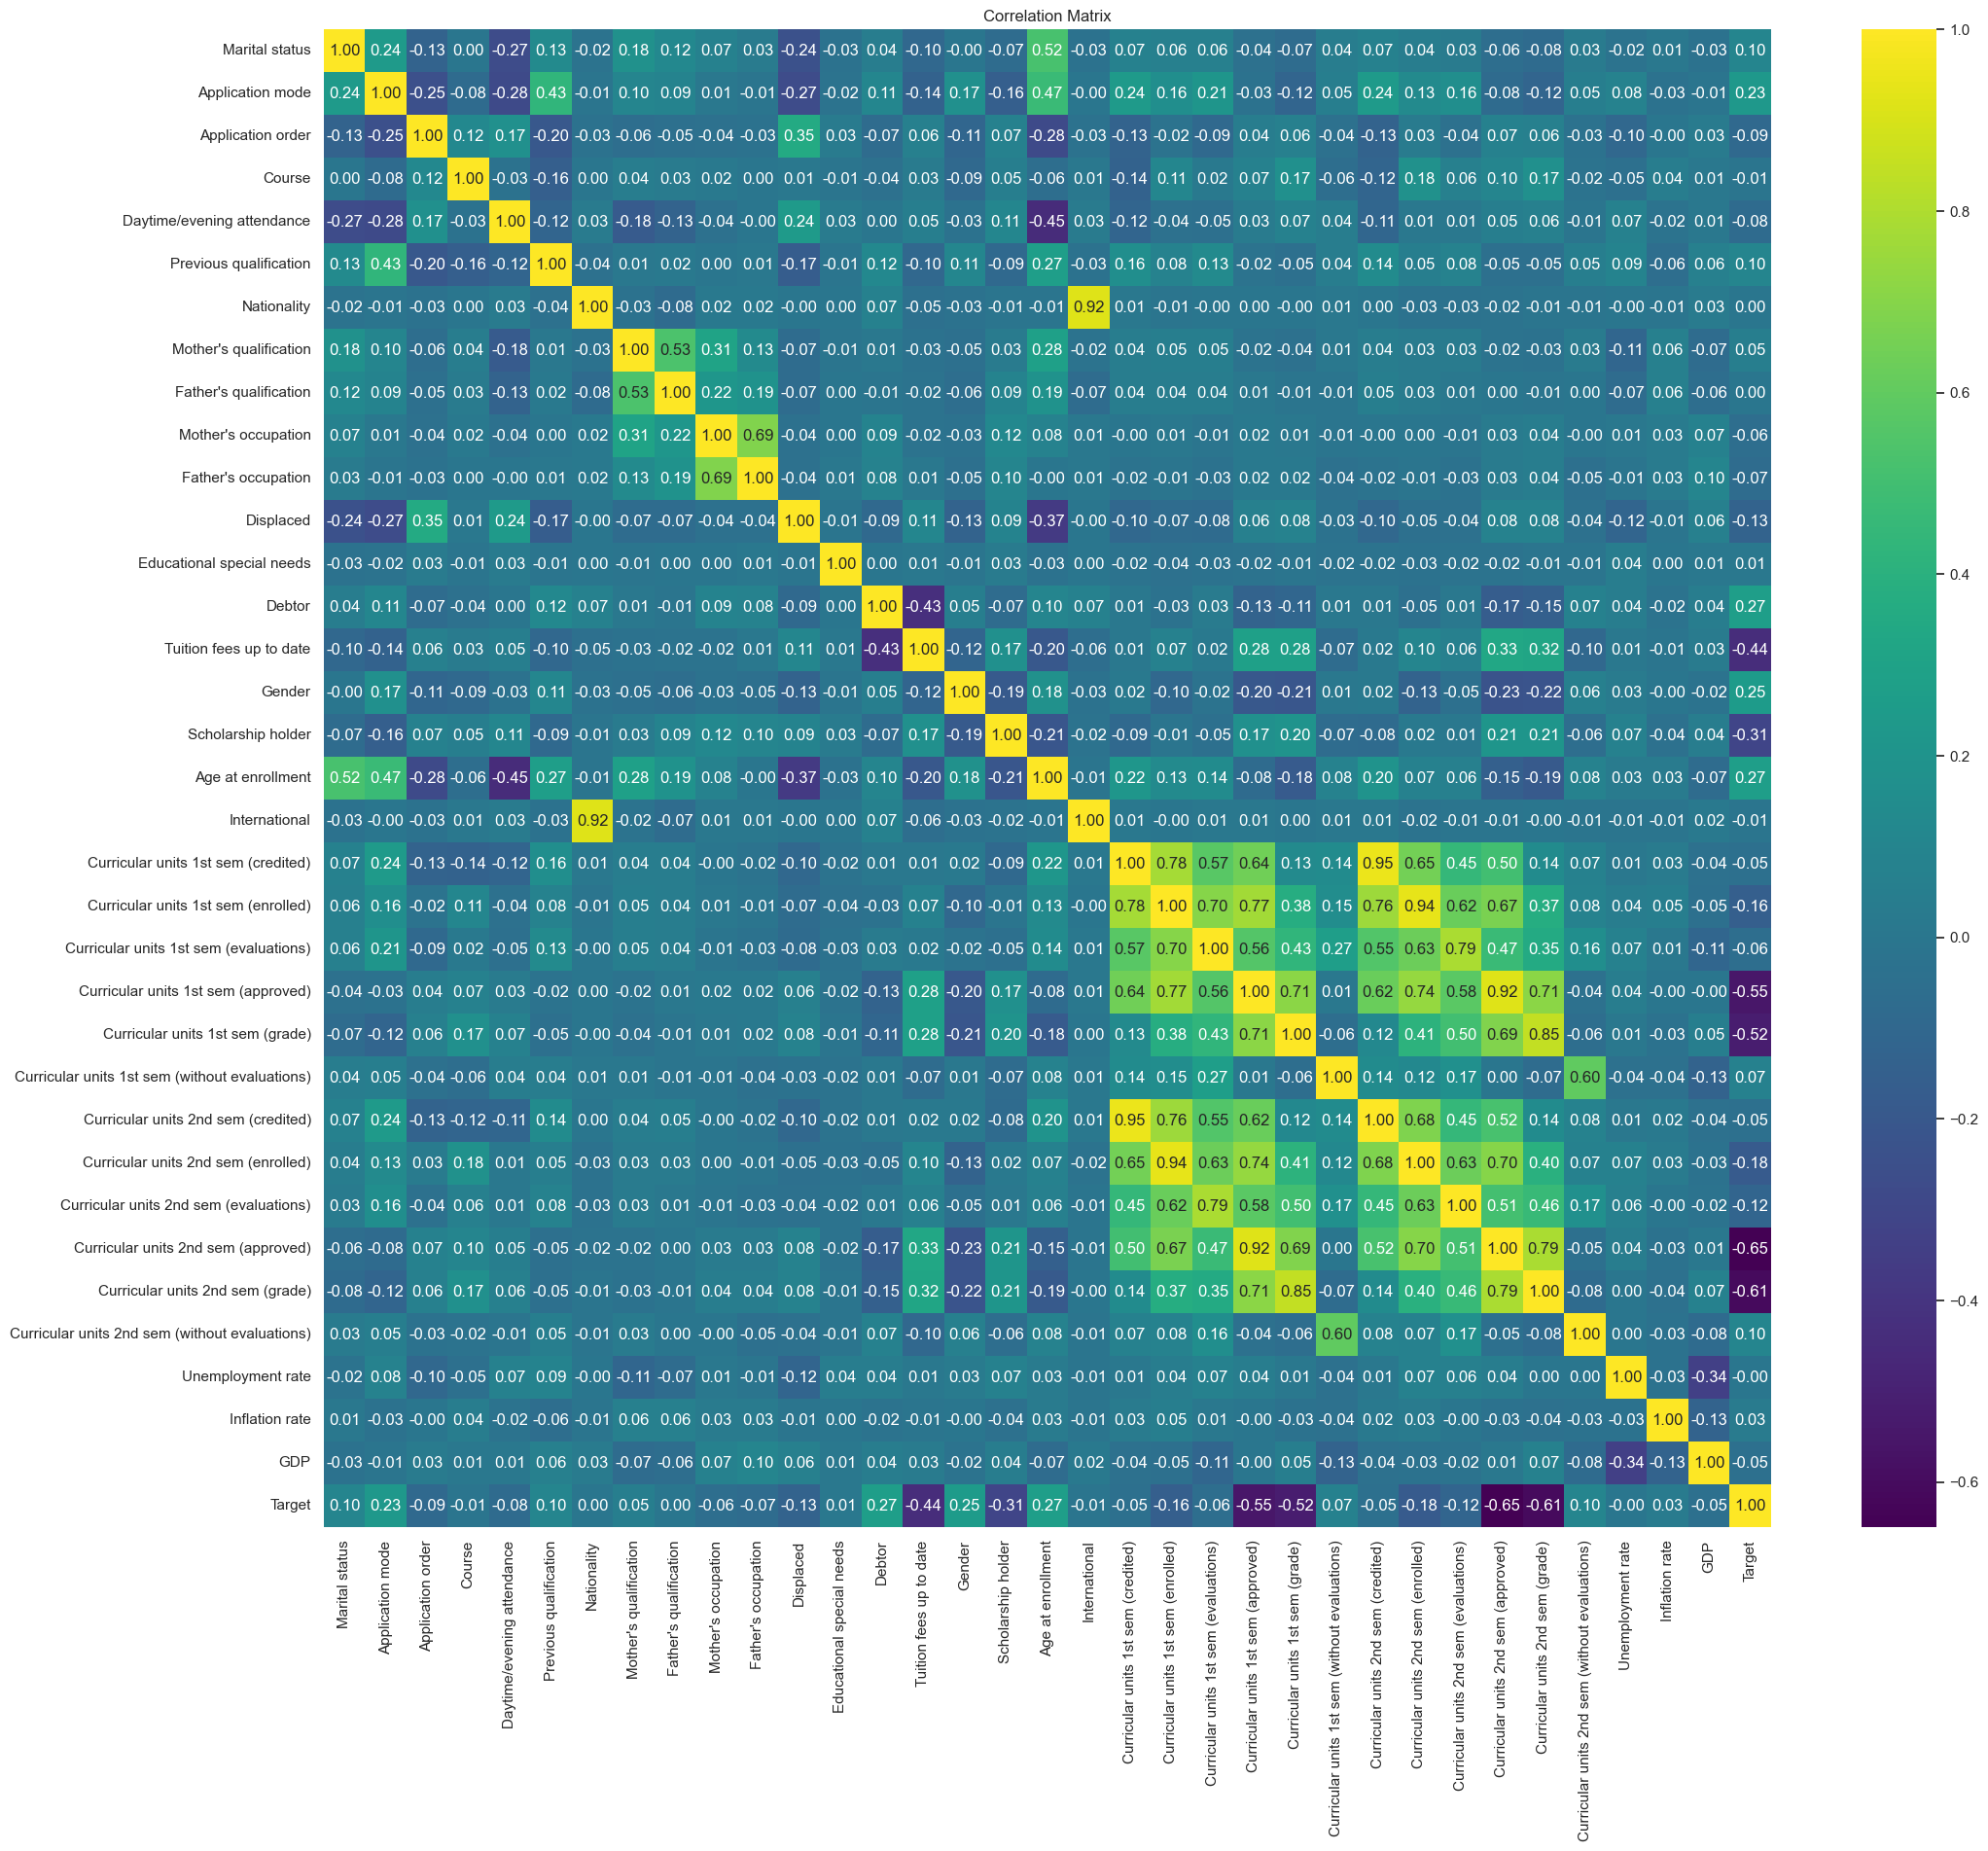

In [24]:
sns.set(rc={"figure.figsize": (24, 20)})  # Increased the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
# Demographic
demographics = df[
    [
        "Marital status",
        "Nationality",
        "Displaced",
        "Gender",
        "Age at enrollment",
        "International",
        "Target",
    ]
]
# Academic
academic_path = df[
    [
        "Curricular units 1st sem (credited)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 2nd sem (grade)",
        "Curricular units 2nd sem (without evaluations)",
        "Target",
    ]
]

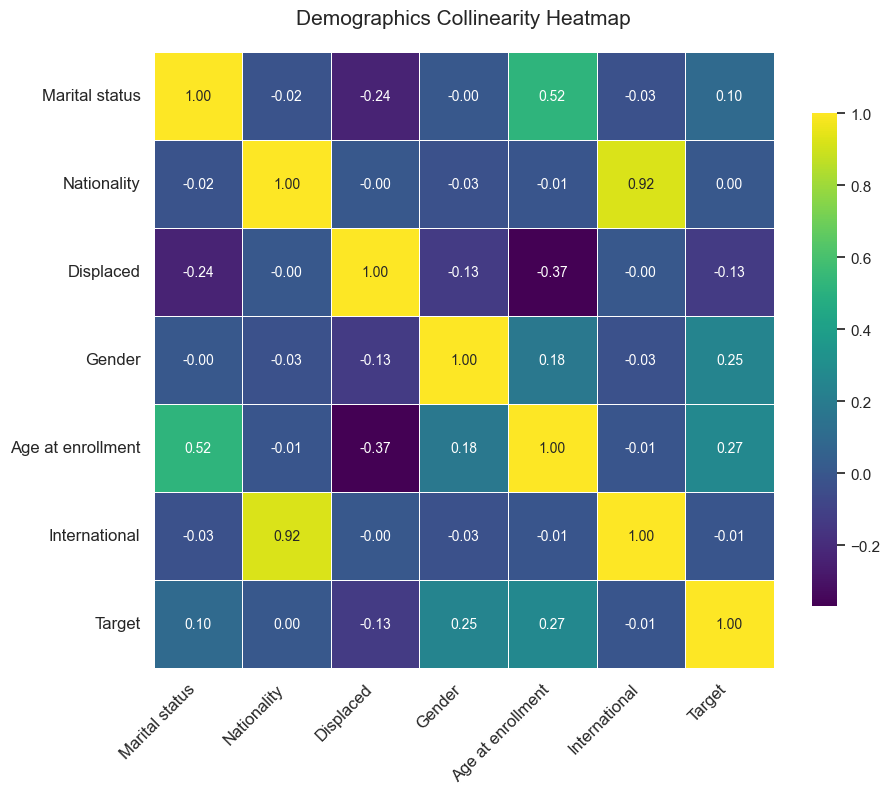

In [26]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.heatmap(
    demographics.corr().round(2),
    linewidths=0.5,
    annot=True,
    annot_kws={"size": 10},
    cmap="viridis",
    cbar_kws={"shrink": 0.8},
    fmt=".2f",
)

plt.title("Demographics Collinearity Heatmap", pad=20, fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
features_to_drop = ["Nationality", "International"]
features_to_drop

['Nationality', 'International']

In [28]:
features_to_drop.extend(
    [
        "Curricular units 1st sem (credited)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (without evaluations)",
    ]
)
features_to_drop

['Nationality',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (without evaluations)']

In [29]:
df.drop(features_to_drop, axis=1, inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,20,0,0,0,0.000000,10.8,1.4,1.74,True
1,1,6,1,11,1,1,1,3,4,4,...,0,19,6,6,6,13.666667,13.9,-0.3,0.79,False
2,1,1,5,5,1,1,22,27,10,10,...,0,19,6,0,0,0.000000,10.8,1.4,1.74,True
3,1,8,2,15,1,1,23,27,6,4,...,0,20,6,10,5,12.400000,9.4,-0.8,-3.12,False
4,2,12,1,3,0,1,22,28,10,10,...,0,45,6,6,6,13.000000,13.9,-0.3,0.79,False


In [30]:
df.corr()["Target"]

Marital status                            0.100479
Application mode                          0.233888
Application order                        -0.094355
Course                                   -0.006814
Daytime/evening attendance               -0.084496
Previous qualification                    0.102795
Mother's qualification                    0.048459
Father's qualification                    0.003850
Mother's occupation                      -0.064195
Father's occupation                      -0.073238
Displaced                                -0.126113
Educational special needs                 0.007254
Debtor                                    0.267207
Tuition fees up to date                  -0.442138
Gender                                    0.251955
Scholarship holder                       -0.313018
Age at enrollment                         0.267229
Curricular units 2nd sem (enrolled)      -0.182897
Curricular units 2nd sem (evaluations)   -0.119239
Curricular units 2nd sem (appro

### **Logistic regression**

In [31]:
X = df.drop(columns="Target", axis=1)
y = df["Target"]

In [32]:
X.shape

(3630, 24)

In [33]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


In [34]:
# Step 1: Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Standardize the feature variables (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Implement cross-validation on Logistic Regression
logreg = LogisticRegression(max_iter=500, random_state=42)
cv_scores = cross_val_score(
    logreg, X_train_scaled, y_train, cv=5
)  # 5-fold cross-validation

# Display cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# Step 6: Train the logistic regression model on the full training data
logreg.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Cross-Validation Scores: [0.91910499 0.89156627 0.89328744 0.90877797 0.9       ]
Mean CV Accuracy: 0.90
Test Set Accuracy: 0.91
Confusion Matrix:
[[427  22]
 [ 44 233]]
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.95      0.93       449
        True       0.91      0.84      0.88       277

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



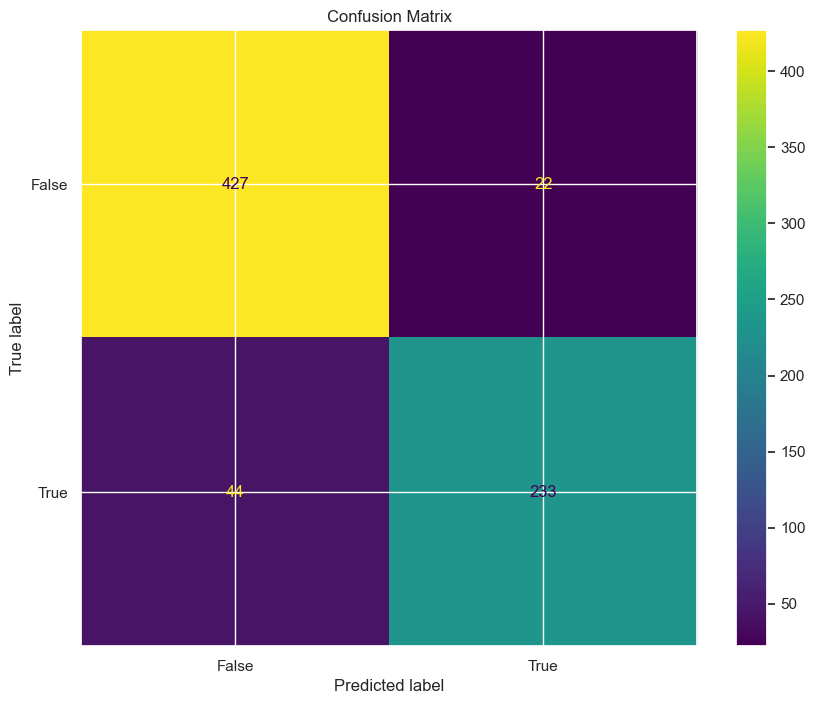

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Import necessary library for plotting

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy for testing data: {accuracy:.3f}")
print(f"Recall for testing data: {recall:.3f}")
print(f"Precision for testing data: {precision:.3f}")
print(f"F1 Score for testing data: {f1:.3f}")

Accuracy for testing data: 0.909
Recall for testing data: 0.841
Precision for testing data: 0.914
F1 Score for testing data: 0.876


In [37]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Step 2: Load and preprocess the data
# Assuming df is your DataFrame and 'Target' is the column you want to predict
X = df.drop(columns="Target")  # Features
y = df["Target"]  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Step 6: Perform 5-fold cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} - Mean CV Accuracy: {cv_scores.mean():.2f}")

# Step 7: Train each model on the training data and evaluate on the test set
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Test Set Accuracy: {accuracy:.2f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{name} - Confusion Matrix:")
    print(conf_matrix)

    # Classification report
    class_report = classification_report(y_test, y_pred)
    print(f"{name} - Classification Report:")
    print(class_report)

Logistic Regression - Mean CV Accuracy: 0.90
Random Forest - Mean CV Accuracy: 0.90
Support Vector Machine - Mean CV Accuracy: 0.90
Gradient Boosting - Mean CV Accuracy: 0.90

Logistic Regression - Test Set Accuracy: 0.91
Logistic Regression - Confusion Matrix:
[[427  22]
 [ 44 233]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.95      0.93       449
        True       0.91      0.84      0.88       277

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726


Random Forest - Test Set Accuracy: 0.90
Random Forest - Confusion Matrix:
[[430  19]
 [ 52 225]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       449
        True       0.92      0.81      0.86       277

    accuracy                           0.9

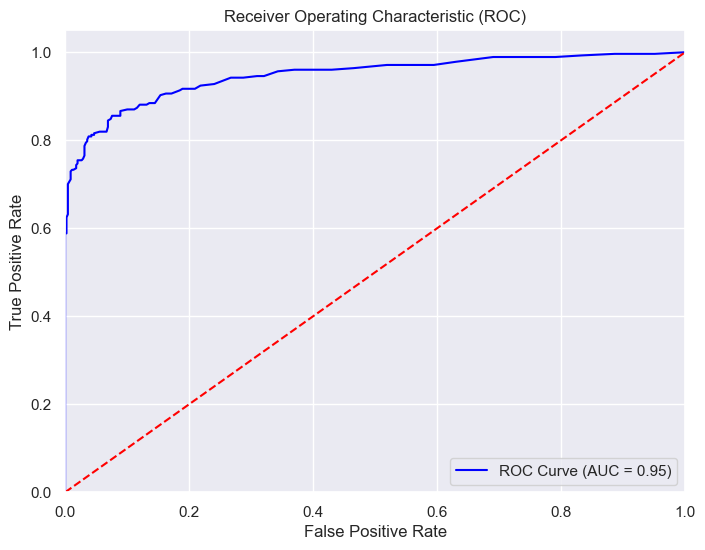

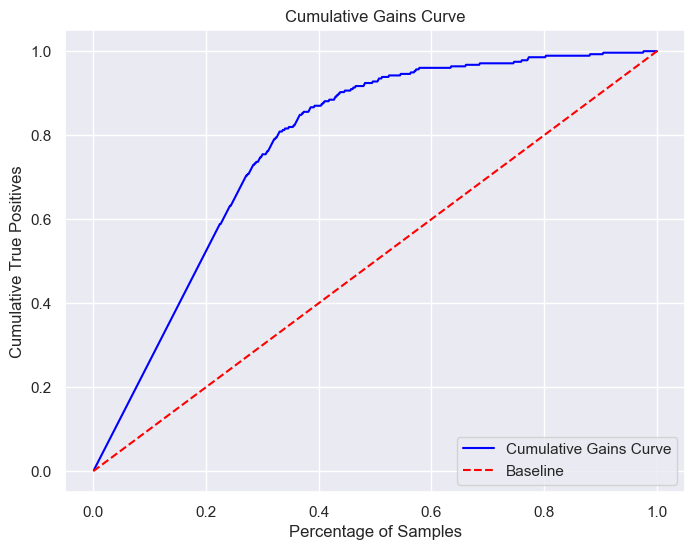

In [38]:
# Step 1: Import necessary libraries
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are already defined

# Train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


# Step 7: Cumulative Gains Curve
def plot_cumulative_gains(y_true, y_pred_proba):
    data = pd.DataFrame({"true": y_true, "probability": y_pred_proba}).sort_values(
        by="probability", ascending=False
    )

    total_positive = np.sum(data["true"])
    cumulative_gains = np.cumsum(data["true"]) / total_positive
    cumulative_percentage = np.arange(1, len(data) + 1) / len(data)

    plt.figure(figsize=(8, 6))
    plt.plot(
        cumulative_percentage,
        cumulative_gains,
        label="Cumulative Gains Curve",
        color="blue",
    )
    plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Baseline")
    plt.xlabel("Percentage of Samples")
    plt.ylabel("Cumulative True Positives")
    plt.title("Cumulative Gains Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


# Call the cumulative gains function
plot_cumulative_gains(y_test, y_pred_prob)

In [49]:
import joblib

# Save the trained model and preprocessor
joblib.dump(model, "logistic_regression_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

End of Document